In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading the Data
bike_data = pd.read_csv(r'D:\Download folder\Mechine Learning\Assignment of Machine Learning\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Converting numerical to Categorical var of SEASON, WEEKDAY, MONTH, WEATHERSIT column
str_list = ['season','weekday','mnth','weathersit']
bike_data[str_list]= bike_data[str_list].astype(str)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [7]:
# Replacing the Season Column's numeric data with their original value

bike_data.season = bike_data.season.replace(['1'], "spring")
bike_data.season = bike_data.season.replace(['2'], "summer")
bike_data.season = bike_data.season.replace(['3'], "fall")
bike_data.season = bike_data.season.replace(['4'], "winter")
bike_data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [8]:
# Replacing the Weekday Column's numeric data with their original value

bike_data.weekday=bike_data.weekday.replace(['0'], 'sunday')
bike_data.weekday=bike_data.weekday.replace(['1'], 'monday')
bike_data.weekday=bike_data.weekday.replace(['2'], 'tuesday')
bike_data.weekday=bike_data.weekday.replace(['3'], 'wednesday')
bike_data.weekday=bike_data.weekday.replace(['4'], 'thursday')
bike_data.weekday=bike_data.weekday.replace(['5'], 'friday')
bike_data.weekday=bike_data.weekday.replace(['6'], 'saturday')
bike_data.weekday.value_counts()

monday       105
sunday       105
saturday     105
friday       104
thursday     104
tuesday      104
wednesday    103
Name: weekday, dtype: int64

In [9]:
# Replacing the Month Column's numeric data with their original value

bike_data.mnth = bike_data.mnth.replace(['1'], "january")
bike_data.mnth = bike_data.mnth.replace(['2'], "february")
bike_data.mnth = bike_data.mnth.replace(['3'], "march")
bike_data.mnth = bike_data.mnth.replace(['4'], "april")
bike_data.mnth = bike_data.mnth.replace(['5'], "may")
bike_data.mnth = bike_data.mnth.replace(['6'], "june")
bike_data.mnth = bike_data.mnth.replace(['7'], "july")
bike_data.mnth = bike_data.mnth.replace(['8'], "august")
bike_data.mnth = bike_data.mnth.replace(['9'], "september")
bike_data.mnth = bike_data.mnth.replace(['10'], "october")
bike_data.mnth = bike_data.mnth.replace(['11'], "november")
bike_data.mnth = bike_data.mnth.replace(['12'], "december")
bike_data.mnth.value_counts()

march        62
december     62
october      62
january      62
may          62
july         62
august       62
september    60
november     60
june         60
april        60
february     56
Name: mnth, dtype: int64

In [10]:
# Replacing the Weathersit Column's numeric data with their original value

bike_data.weathersit = bike_data.weathersit.replace(['1'], "Clear")
bike_data.weathersit = bike_data.weathersit.replace(['2'], "Mist/Cloudy")
bike_data.weathersit = bike_data.weathersit.replace(['3'], "Light Snow/Rain") 
bike_data.weathersit.value_counts()

Clear              463
Mist/Cloudy        246
Light Snow/Rain     21
Name: weathersit, dtype: int64

In [11]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Dropping some column as this column are not at all needed for our linear model building..
bike_data= bike_data.drop(['instant','dteday','atemp','casual','registered'], axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist/Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist/Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600


##### Data Visualisation( Numeric Variable) by plotting pair

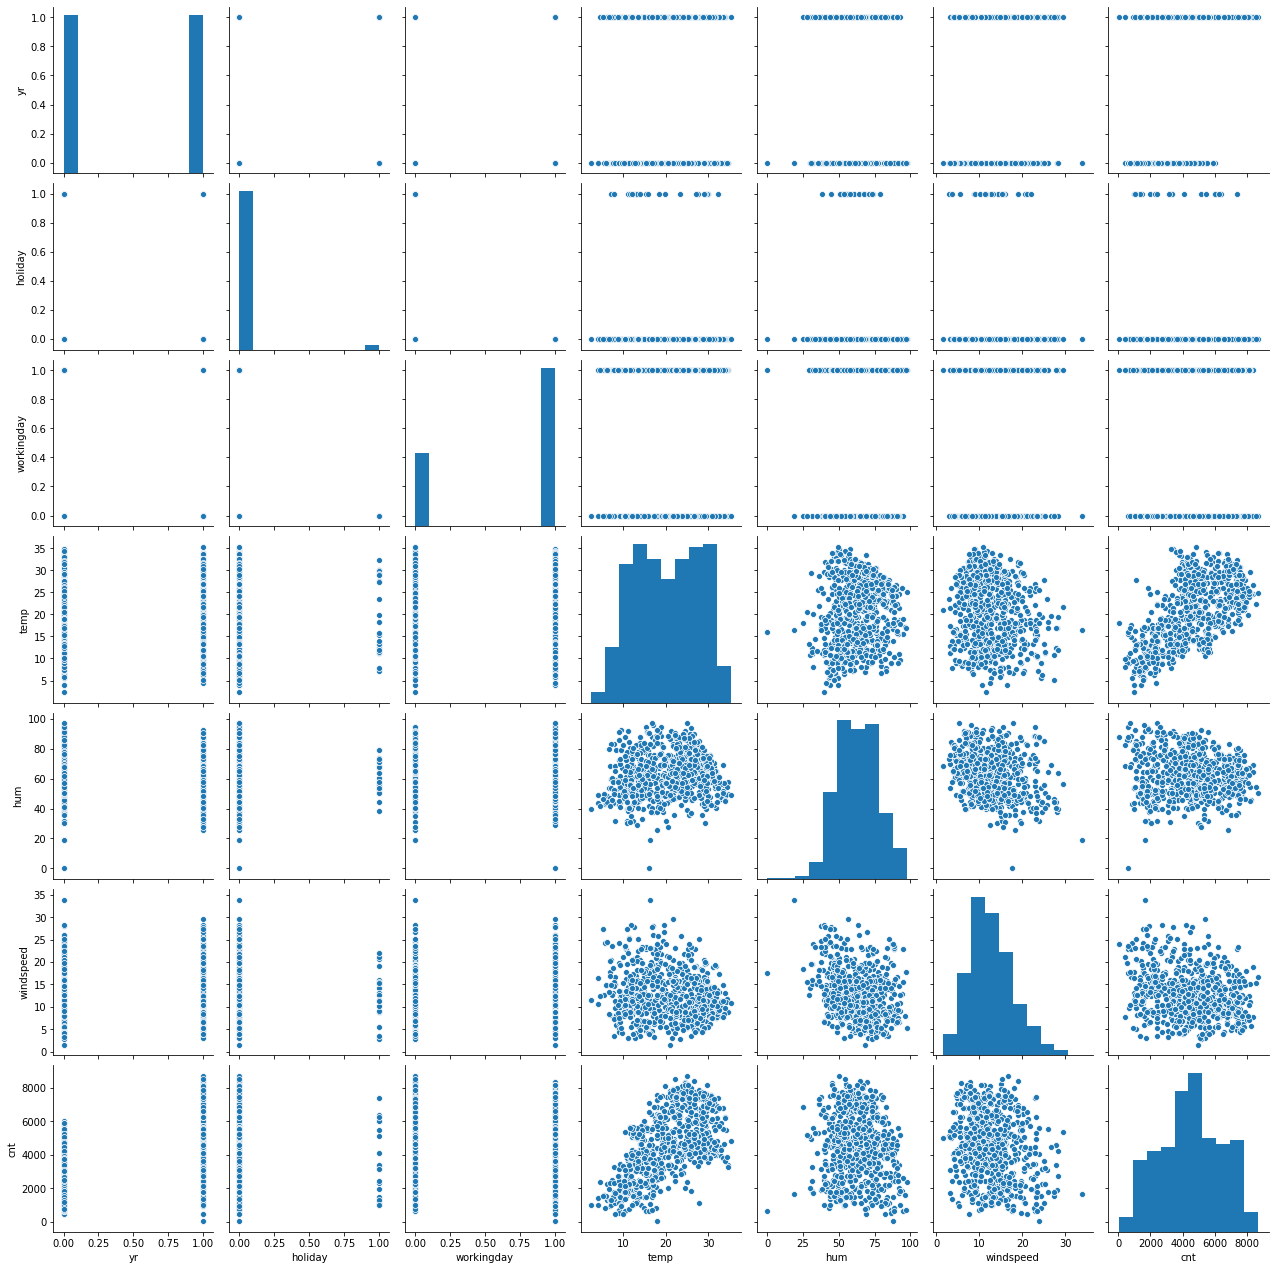

In [13]:
sns.pairplot(bike_data)
plt.show()

###### Points that are observed --
- The target variable column i.e `cnt` column is likely to have a normal distribution. The base is more flatten than the top. 
- With `temp` column, there is a linear relation to some extent and maximum data are belong to the uper range of temperature.
- `Windspeed` & `hum` column are not at all show any linear relationship with the target column. The distribution are very much scattered.
- For `Workingday` variable, the data are almost same distribution for `1` & `0` with respect to the target var.
- There is a negetive relation with `Holiday` var as from data it is seen that `cnt` is more high in **non holiday days as compare to the holiday days**

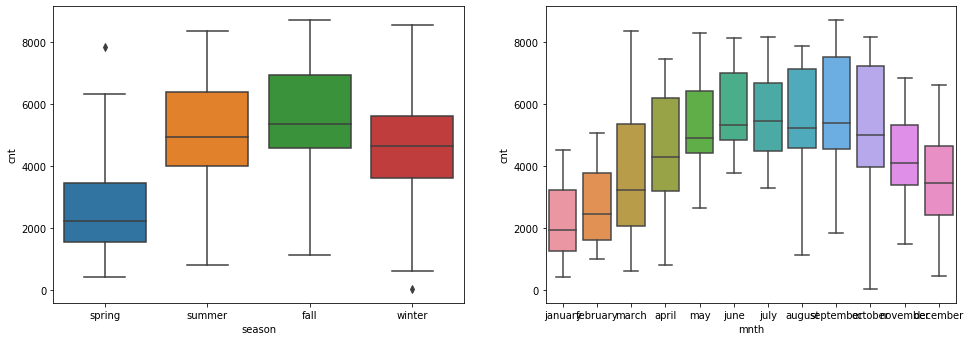

In [14]:
# Plotting Boxplot for categorical variable.
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y='cnt', data= bike_data)
plt.show()

- During `fall` season the count is higher than other season. Maximum count lies in the 3rd quartile range. `Spring` has low number of count than other season. One outlier is also seen.
- September has a high number of count than others month. It is also seen than number of count is gradually increases accross the month and middle of the year i.e `july, august, september & october` has a high range of business than other months. Its also gradually falls at the end of the year, which is very interesting.

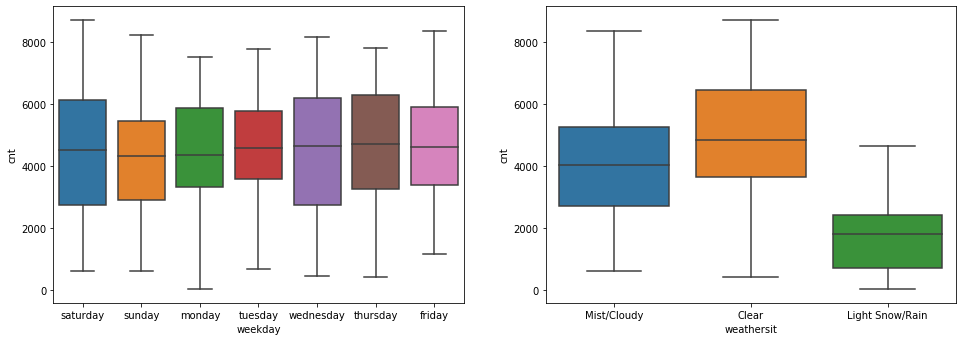

In [15]:
# Plotting Boxplot for categorical variable.
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y='cnt', data= bike_data)
plt.show()

- Through out the week the number of count are almost same for each day, lies between 4000-6000. For `Saturday` the maximum count is high than other days. Median is almost same for each days. The distribution is also quite normal for each days.
- demand is higher in `clear` weather as compare to `Light snow/Rain` weather. In `Mist/Cloudy` weather the demand is not so suspisious. Its a quite healthy demand.

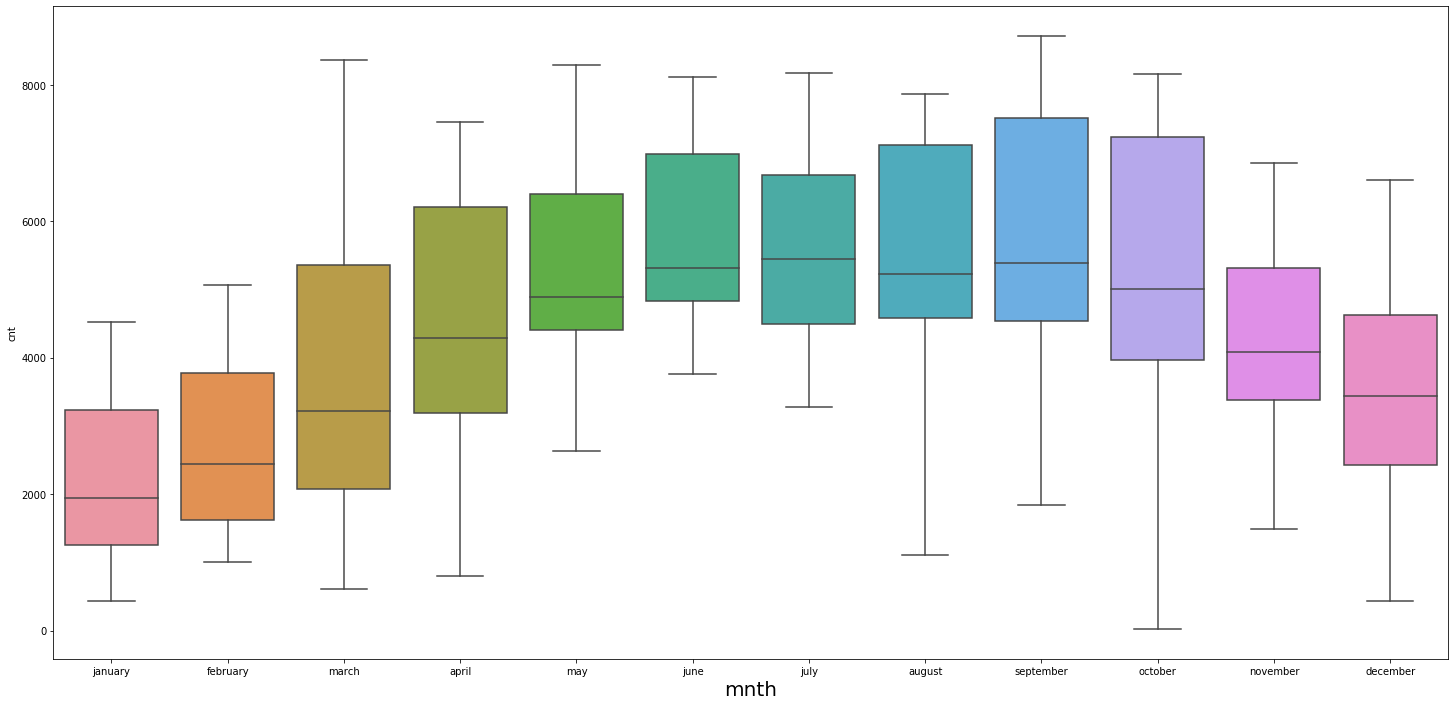

In [16]:
plt.figure(figsize=(25, 12))
sns.boxplot(x ='mnth', y='cnt', data= bike_data)
plt.xlabel('mnth',fontsize=20)
plt.show()

In [17]:
var_list= ['season','mnth','weekday','weathersit']
status = pd.get_dummies(bike_data[var_list], drop_first=True)

In [18]:
status.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
status.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_Light Snow/Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [20]:
# Renaming the column for better understanding..

status.rename(columns={'season_spring':'spring', 'season_summer':'summer','season_winter':'winter','mnth_august':'august',
       'mnth_december':'december', 'mnth_february':'february', 'mnth_january':'january', 'mnth_july':'july',
       'mnth_june':'june', 'mnth_march':'march', 'mnth_may':'may', 'mnth_november':'november', 'mnth_october':'october',
       'mnth_september':'september', 'weekday_monday':'monday', 'weekday_saturday':'saturday',
       'weekday_sunday':'sunday', 'weekday_thursday':'thursday', 'weekday_tuesday':'tuesday','weathersit_Light Snow/Rain':'Lightsnow/Rain',
       'weathersit_Mist/Cloudy':'Mist/cloudy',
       'weekday_wednesday':'wednesday'}, inplace=True)

In [21]:
status.head()

,spring,summer,winter,august,december,february,january,july,june,march,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Concating the the dummy dataframe...

bike_data= pd.concat([bike_data, status], axis=1)

In [23]:
bike_data.shape

(730, 33)

In [24]:
pd.options.display.max_columns = 50
bike_data = bike_data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
0,spring,0,january,0,saturday,0,Mist/Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,january,0,sunday,0,Mist/Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,january,0,monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,january,0,wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
bike_data.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the dataframe into train and test part

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Applying Scaler to column except "Binary" and "Dummy" column

In [27]:
scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-1.179424e-02,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,3.741163e-02,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-2.815377e-02,-0.038279
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,0.092320,-0.037932,0.043274,-0.057297,0.040575,-0.031500,-1.680257e-02,-2.129625e-02,-0.006030,0.004694,0.030677,0.059006,-0.041271,-0.041271,0.019495,0.174565,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501,2.115873e-02,0.040766
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-4.467239e-01,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.032126,-0.042274,-0.017048,2.826576e-03,0.046646,0.029363,-3.609266e-02,-0.090161
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-7.165160e-02,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,0.022612,-0.040521,0.012224,-3.822174e-02,0.010123,0.047185,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,6.793368e-03,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,-0.004372,0.049356,-0.001221,-4.353283e-03,-0.005849,-0.019567,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-3.781731e-01,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-0.009552,-0.016215,-0.063385,9.709936e-03,0.031883,0.025216,-2.265984e-01,-0.175530
spring,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,5.488613e-01,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,-0.009212,0.022641,0.003276,6.274901e-03,-0.030988,-0.008680,-4.455809e-02,0.013970
summer,0.013856,-0.063232,0.043274,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-1.772574e-01,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,0.001623,-0.017169,-0.011612,-2.234951e-02,0.021300,0.039248,-4.523062e-02,0.039442
winter,-0.022638,0.050712,-0.057297,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,-0.187737,0.314816,-1.538999e-01,-1.791357e-01,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175,0.035783,0.016635,0.036531,-1.244916e-02,-0.009185,-0.026926,1.144484e-01,0.023127


#### Deviding train set into X and y

In [30]:
y_train= df_train.pop('cnt')
X_train = df_train

### Applying RFE

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 7),
 ('december', False, 3),
 ('february', False, 4),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 14),
 ('may', False, 5),
 ('november', False, 2),
 ('october', False, 10),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 6),
 ('thursday', False, 11),
 ('tuesday', False, 9),
 ('wednesday', False, 12),
 ('Lightsnow/Rain', True, 1),
 ('Mist/cloudy', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'january', 'july', 'september', 'saturday',
       'Lightsnow/Rain', 'Mist/cloudy'],
      dtype='object')

## Building Model
#### Model 1

In [35]:
X_train_rf = X_train[col]

In [36]:
X_train_rfe = sm.add_constant(X_train_rf)
lr= sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        18:54:08   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

In [37]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_rf.values, i) for i in range(X_train_rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist/cloudy,2.29
0,yr,2.09
12,saturday,1.98


Looking at the starting model the R-squared and Adj. R-Squared `0.849`&`0.844` respectively that indicates a quite good model. Looking at the VIF, two features i.e `temp`&`hum` has very high VIF which means there is a strong relation between this two independent variable. But looking at the summary it is also seen that `january`&`holiday` also has high `p-value` which is also not acceptable. So first I am going to drop `january` column to examine whether any changes occure in the VIF value of `temp`&`hum`.

## MODEL 2

In [38]:
X = X_train_rf.drop(['january'],axis=1)

In [39]:
X_train_rfe = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        18:54:24   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2394      0.036      6.

In [40]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist/cloudy,2.28
0,yr,2.08
11,saturday,1.97


 Still the model is quite good as per the R-squared and Adj.R-squared. But there is no significant change in the `VIF` value of **temp** & **hum**.
 But for the **holiday** column the `p_value` is still high. So lets drop this column and check whether any changes occure in the VIF value or not.

### Model 3

In [41]:
X_1 = X.drop('holiday', 1,)

In [42]:
X_train_rfe = sm.add_constant(X_1)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        18:54:37   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2298      0.036      6.

In [43]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
12,Mist/cloudy,2.28
0,yr,2.08
10,saturday,1.84


Still the model is quite good and all the `p-value` are in acceptable range. But as per the **VIF** still there is a collinearity aming **temp** and **hum** column. So lets drop the `hum` column and check the VIF and P-value of all attributes.

### Model 4

In [44]:
X_2 = X_1.drop('hum',1,)

In [45]:
X_train_rfe = sm.add_constant(X_2)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.28e-189
Time:                        18:54:48   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.031      4.

In [46]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,saturday,1.83
7,july,1.58
11,Mist/cloudy,1.56


After dropping the `hum` column the VIF value of `temp` attribute has significantly changeed. But still it is above 5. As we have seen from the `pairplot` that temperature has a **quite linear relationship with `cnt`**, so I am not goint to drop this column directly. Rather from the summary it is seen that `july` is negetively correlated and **p-value** is slightly high so lets drop july and then check.

### Model 5

In [47]:
X_3 = X_2.drop('july',1,)

In [48]:
X_train_rfe = sm.add_constant(X_3)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.86e-189
Time:                        18:54:58   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1405      0.031      4.

In [49]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_3.columns
vif['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,saturday,1.83
6,winter,1.77
10,Mist/cloudy,1.56
7,september,1.23


All `p-value` is quite good and also R-squared is quite good. But still the VIF value of temp is high. As temp is a important column, so we cant let it be droped, lets try to drop the `spring` column as per `p-value`and their might have collinearity issue with **temp** & weather factor. So lets drop this & check the model...

### Model 6

In [50]:
X_4 = X_3.drop('spring',1,)

In [51]:
X_train_rfe = sm.add_constant(X_4)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        18:55:05   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0753      0.019      4.

In [52]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_4.columns
vif['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,saturday,1.69
4,summer,1.57
9,Mist/cloudy,1.53
5,winter,1.40
6,september,1.20
8,Lightsnow/Rain,1.08


 #### Note:-
 - Now we can say that this model is quite good and fit. **R-squared**(83.6%) & **Adj. R-squared**(83.2%) are quite good for acceptable. As per `p-value` all attributes are justified their own significance with the target variable.
 - No multicollinearity is there and all attributes' VIF value are also below 5 which is also signifies the model for its fitness.
 - Now lets try to predict and evaluate our final model with the **unseen data**.
 
 
 ### Residual Analysis of the train data

In [53]:
y_train_cnt = lr_4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

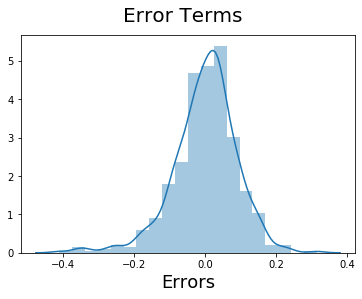

In [54]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Looking at the `Error Term` it can say that data are normally distributed. No as such wide variation is seen. All factors combinely shows a linear relationship with the target variable. Lets making prediction.


## Making Prediction and Evaluation using Final Model( Model 6 )

In [55]:
# Applysing Scaler for Test set
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [56]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Lightsnow/Rain,Mist/cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Deviding Test set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Directly taking column from the final model dataframe(X_4)

X_test_tm = X_test[X_4.columns]
X_test_new = sm.add_constant(X_test_tm)

In [59]:
# Making prediction using the final model

y_pred = lr_4.predict(X_test_new)

In [60]:
# Calculating R-squared score for test dataset

from sklearn.metrics import r2_score
R_sqr_score = r2_score(y_test, y_pred)
print('R_sqr_score =', R_sqr_score)

R_sqr_score = 0.7955844377237248


In [61]:
y_test.shape

(219,)

## Model Evaluation

#### Plotting graph to present Actual vs Predicted view

Text(0, 0.5, 'Count')

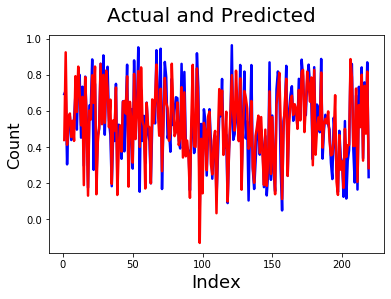

In [62]:
#Actual vs Predicted as a line plot

c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Count', fontsize=16)                               

Text(0, 0.5, 'y_test')

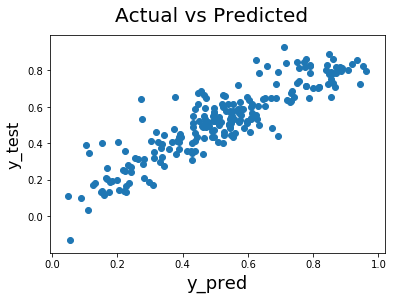

In [63]:
# Actual vs Predicted as a scatter plot view
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)               
plt.xlabel('y_pred', fontsize = 18)                         
plt.ylabel('y_test', fontsize = 16)  

So we can say that our best fitted line is

$ CNT = 0.233 \times yr + 0.056 \times workingday + 0.549 \times temp - 0.155 \times windspeed + 0.087 \times summer + 0.132 \times winter + 0.097 \times september + 0.067 \times saturday - 0.288 \times Light snow/Rain - 0.081 \times Mist/clody $

## Conclusion:-

#### So from our best fitted line we can clearly say that the top significant factor that impacted the demand for sharing bike are (apart from Year. Though the Year has a considerable correlation with count but it basically indicate the year-wise counts that how much demands become high than the previous year. It cant describe nothing more than that). So we are taking those factor which actually signifies the true story for demand generation...

1. **Temp**. temp has a very high positive correlation with the demand. if temp increases by 1 unit sharing demand would increase by 0.549 units. From the data distribution it says that when temperature getting increases demand also gradually increases.


2. Second most significant factor is `Light snow/Rain` which has a high negetive correlation with demand. If the weather is a Rainy or Light snow weather then the demand becomes low. So its indicate that people loves to rent for bike share in hassle free weather compare to Rainy weather. And that we have also seen from our boxplot also that demand for rainy weather are much low compare to other two weather condition type.


3. Third most important factor is **windspeed**. It is also has negetive correlation with `cnt`. In high windspeed people are not willing to take rent for shared bike. It might be possible that in high windspeed they dont feel as such comfortable which they have in low or moderate windspeed conditions.


4. Apart from this 3 major factors there are also other factor that also have correlation with demand like - **summer**. Demand is high in summer season. Also **saturday** has a positive correlation with demand. It might be possible that as saturday is considered as weekend, so extra demand becomes generated in that perticular day of the week.